# Plot COCO Dataset ground truth images

This code is me combining different code that I found for my own learning. Credit to these repositories that I used to create the following notebook.

- [albumentations](https://github.com/albu/albumentations)
- [cocoapi](https://github.com/cocodataset/cocoapi)
- [cv2 output RGB blog](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_matplotlib_rgb_brg_image_load_display_save.php)

The COCO dataset must be dowloaded to use this notebook [val2014](http://images.cocodataset.org/zips/val2014.zip) and the [annotations](http://images.cocodataset.org/annotations/annotations_trainval2014.zip). The code expects these two directory downloads to live in `~/data/coco`


In [1]:
import json
import os

import numpy as np
from matplotlib import patches, patheffects
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

plt.ion()
pylab.rcParams['figure.figsize'] = 12, 12

In [2]:
def load_json(path):
    "Loads JSON as a Python object from a given file path"
    with open(path) as f:
        data = json.loads(f.read())
    return data

In [3]:
def get_imageid_to_imageann():
    return {x['id']: x for x in ANN['images']}

HOME_DIR = os.path.expanduser('~')
DATA_DIR = os.path.join(HOME_DIR, 'data/coco/val2014/')
ANN_DIR = os.path.join(HOME_DIR, 'data/coco/annotations/')

ANN = load_json(os.path.join(ANN_DIR, 'instances_val2014.json'))
IMAGEID_TO_IMAGEANN = get_imageid_to_imageann()
CATEGORY_ID_TO_NAME = {x['id']: x['name'] for x in ANN['categories']}

In [4]:
ANN.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

# get the data format for each one of the annotations

In [101]:
import pprint

for key in list(ANN.keys()):
    print(key, type(ANN[key]))
    print(next(iter(ANN[key])))
    print()

info <class 'dict'>
description

images <class 'list'>
{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}

licenses <class 'list'>
{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}

annotations <class 'list'>
{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}

categories <class 'list'>
{'supercategory': 'person', 'id': 1, 'name': 'person'}



In [6]:
ANN['info']

{'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [7]:
len(ANN['images']), len(ANN['annotations'])

(40504, 291875)

In [8]:
len(IMAGEID_TO_IMAGEANN)

40504

In [9]:
def get_imageid_to_anns(ann_path=None, ann=None):
    """
    Returns a dict where the key is an imageid and the value
    is a list of annotations for that image
    """
    if not any([ann_path, ann]) or all([ann_path, ann]):
        raise AssertionError("can only use 1 kwarg")

    if not ann:
        ann = load_json(ann_path)

    imageid_to_anns = {}
    for img in ann['images']:
        imageid_to_anns[img['id']] = []

    for a in ann['annotations']:
        imageid_to_anns[a['image_id']].append(a)

    return imageid_to_anns

IMAGEID_TO_ANN = get_imageid_to_anns(ann=ANN)

assert len(IMAGEID_TO_ANN) == len(ANN['images'])

len(IMAGEID_TO_ANN)

40504

In [10]:
# validate!

In [11]:
ann_count = 0
for imageid, annot in IMAGEID_TO_ANN.items():
    ann_count += len(annot)
    
assert ann_count == len(ANN['annotations'])

ann_count

291875

In [12]:
len(ANN['images']), len(ANN['annotations'])

(40504, 291875)

In [13]:
image_id, img_ann = next(iter(IMAGEID_TO_IMAGEANN.items()))
image_id, img_ann

(391895,
 {'license': 3,
  'file_name': 'COCO_val2014_000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895})

In [14]:
import cv2
import os

def open_image(image_path):
    """
    Returns an image as a rgb np.ndarray
    """
    bgr_img = cv2.imread(image_path)
    # get b,g,r
    b,g,r = cv2.split(bgr_img)
    # switch it to rgb
    return cv2.merge([r,g,b])

image_path = os.path.join(DATA_DIR, img_ann['file_name'])
image = open_image(image_path)
image.shape

(360, 640, 3)

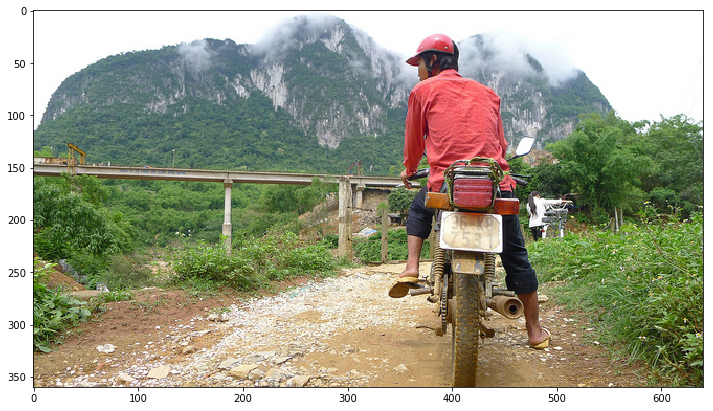

In [15]:
pylab.rcParams['figure.figsize'] = 12, 12

def show_img(image):
    plt.imshow(image)
    
show_img(image)

## plot bboxes!

In [16]:
image_id

391895

In [17]:
len(IMAGEID_TO_ANN[image_id])

4

In [18]:
IMAGEID_TO_ANN[image_id][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [19]:
bboxes = [x['bbox'] for x in IMAGEID_TO_ANN[image_id]]
bboxes

[[359.17, 146.17, 112.45, 213.57],
 [339.88, 22.16, 153.88, 300.73],
 [471.64, 172.82, 35.92, 48.1],
 [486.01, 183.31, 30.63, 34.98]]

In [20]:
category_ids = [x['category_id'] for x in IMAGEID_TO_ANN[image_id]]
category_ids

[4, 1, 1, 2]

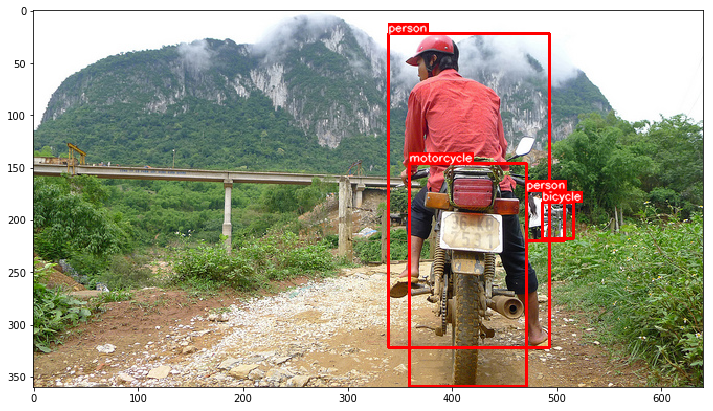

In [21]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img, class_name, (x_min, y_min - int(0.3 * text_height)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
annotations = {
    'image': image, 
    'bboxes': bboxes,
    'category_id': category_ids
}

visualize(annotations, CATEGORY_ID_TO_NAME)

## plot masks!

In [22]:
seg = IMAGEID_TO_ANN[image_id][0]['segmentation'][0]
poly = np.array(seg).reshape((int(len(seg)/2), 2))
poly

array([[376.97, 176.91],
       [398.81, 176.91],
       [396.38, 147.78],
       [447.35, 146.17],
       [448.16, 172.05],
       [448.16, 178.53],
       [464.34, 186.62],
       [464.34, 192.28],
       [448.97, 195.51],
       [447.35, 235.96],
       [441.69, 258.62],
       [454.63, 268.32],
       [462.72, 276.41],
       [471.62, 290.98],
       [456.25, 298.26],
       [439.26, 292.59],
       [431.98, 308.77],
       [442.49, 313.63],
       [436.02, 316.86],
       [429.55, 322.53],
       [419.84, 354.89],
       [402.04, 359.74],
       [401.24, 312.82],
       [370.49, 303.92],
       [391.53, 299.87],
       [391.53, 280.46],
       [385.06, 278.84],
       [381.01, 278.84],
       [359.17, 269.13],
       [373.73, 261.85],
       [374.54, 256.19],
       [378.58, 231.11],
       [383.44, 205.22],
       [385.87, 192.28],
       [373.73, 184.19]])

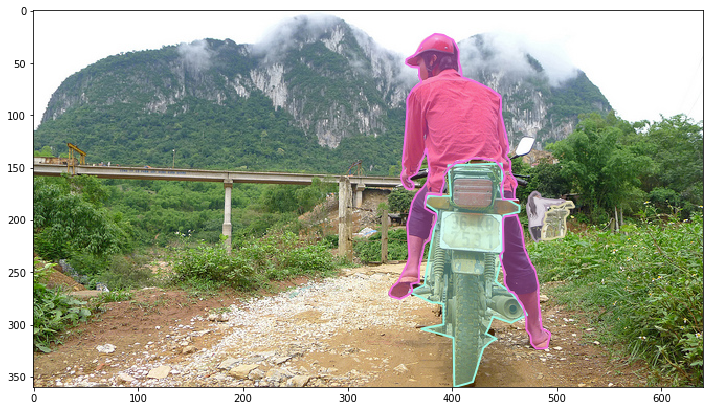

In [23]:
show_img(image)

ax = plt.gca()
polygons = []
color = []
anns = IMAGEID_TO_ANN[image_id]
for ann in anns:
    c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]

    # polygon
    for seg in ann['segmentation']:
        poly = np.array(seg).reshape((int(len(seg)/2), 2))
        polygons.append(Polygon(poly))
        color.append(c)

p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)

## put it all together!

In [24]:
IMAGE_IDS = list(IMAGEID_TO_IMAGEANN.keys())

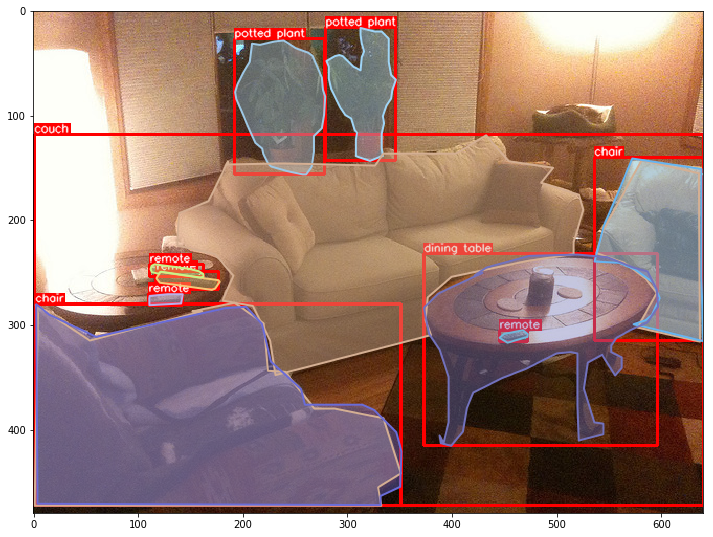

In [107]:
def plot_bboxes_and_masks(image_id=None):
    image_id = image_id or np.random.choice(IMAGE_IDS)
    image_ann = IMAGEID_TO_IMAGEANN[image_id]
    image_path = os.path.join(DATA_DIR, image_ann['file_name'])
    image = open_image(image_path)

    # image + bboxes
    bboxes = [x['bbox'] for x in IMAGEID_TO_ANN[image_id]]
    category_ids = [x['category_id'] for x in IMAGEID_TO_ANN[image_id]]
    annotations = {
        'image': image, 
        'bboxes': bboxes,
        'category_id': category_ids
    }
    visualize(annotations, CATEGORY_ID_TO_NAME)

    ax = plt.gca()
    polygons = []
    color = []
    anns = IMAGEID_TO_ANN[image_id]
    for ann in anns:
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        # polygon
        for seg in ann['segmentation']:
            poly = np.array(seg).reshape((int(len(seg)/2), 2))
            polygons.append(Polygon(poly))
            color.append(c)

    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)
    
plot_bboxes_and_masks()

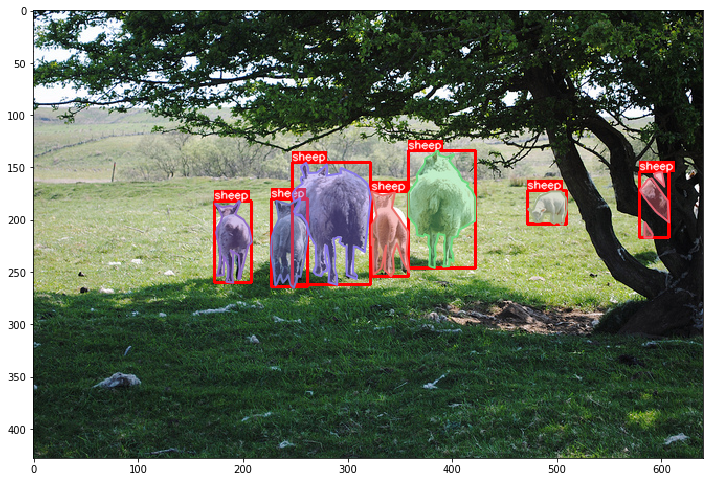

In [108]:
plot_bboxes_and_masks()

## review dataset format

In [27]:
ANN.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [28]:
ANN['images'][0]

{'license': 3,
 'file_name': 'COCO_val2014_000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [29]:
ANN['annotations'][0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

# Plot my own labeled data

Note: this data format is using **RectLabel**. From what I can tell, it doesn't export `"segmentation"`
data to the same format as COCO Dataset 2014 that I'm using, so I'm going to use **Labelme** instead
I think

In [30]:
CAR_ANN = load_json('/Users/aaron/Desktop/license_plate_detection/annotations/1.json')

## image 1 bboxes

In [31]:
image = open_image('/Users/aaron/Desktop/license_plate_detection/images/1.jpg')
image.shape

(450, 600, 3)

In [32]:
# show_img(car_img)

In [33]:
CAR_ANN.keys()

dict_keys(['version', 'flags', 'shapes', 'lineColor', 'fillColor', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [34]:
CAR_ANN['shapes']

[{'label': 'car',
  'line_color': None,
  'fill_color': None,
  'points': [[99, 132], [476, 397]],
  'shape_type': 'rectangle'},
 {'label': 'license',
  'line_color': None,
  'fill_color': None,
  'points': [[247, 303], [324, 343]],
  'shape_type': 'rectangle'},
 {'label': 'car',
  'line_color': None,
  'fill_color': None,
  'points': [[155, 190],
   [195, 140],
   [213, 132],
   [374, 134],
   [427, 196],
   [430, 185],
   [463, 188],
   [462, 203],
   [434, 210],
   [472, 247],
   [477, 272],
   [469, 386],
   [112, 387],
   [100, 353],
   [102, 245],
   [145, 203],
   [124, 196],
   [120, 181],
   [152, 178]],
  'shape_type': 'polygon'},
 {'label': 'license',
  'line_color': None,
  'fill_color': None,
  'points': [[246, 342], [246, 303], [322, 303], [324, 344]],
  'shape_type': 'polygon'}]

In [35]:
raw_bbs = [x['points'] for x in CAR_ANN['shapes'] if x['shape_type'] == 'rectangle']
raw_bbs

[[[99, 132], [476, 397]], [[247, 303], [324, 343]]]

In [36]:
np_bbs = np.array(raw_bbs)
np_bbs

array([[[ 99, 132],
        [476, 397]],

       [[247, 303],
        [324, 343]]])

In [37]:
raw_bbs = [x['points'] for x in CAR_ANN['shapes'] if x['shape_type'] == 'rectangle']

np_bbs = np.array(raw_bbs)

bboxes = np.reshape(np_bbs, (np_bbs.shape[-1], -1))
print(bboxes.shape)

pascal_bboxes = np.array([bboxes[:,0], bboxes[:,1], bboxes[:,2]-bboxes[:,0], bboxes[:,3]-bboxes[:,1]]).T

(2, 4)


In [38]:
shapes = set()
i = 0
for x in CAR_ANN['shapes']:
    shapes.add(x['label'])
shapes

{'car', 'license'}

In [39]:
category_id_to_name = {i:s for i,s in enumerate(shapes)}
category_id_to_name

{0: 'car', 1: 'license'}

In [40]:
category_ids = list(category_id_to_name)
category_ids

[0, 1]

In [41]:
# def fastai_bbs(bbs):
#     return np.array([bbs[:,1], bbs[:,0], bbs[:,3]-bbs[:,1]+1, bbs[:,2]-bbs[:,0]+1]).T
        
# fastai_bbs(bboxes)

In [42]:
bboxes

array([[ 99, 132, 476, 397],
       [247, 303, 324, 343]])

In [43]:
pascal_bboxes = np.array([bboxes[:,0], bboxes[:,1], bboxes[:,2]-bboxes[:,0], bboxes[:,3]-bboxes[:,1]]).T
pascal_bboxes

array([[ 99, 132, 377, 265],
       [247, 303,  77,  40]])

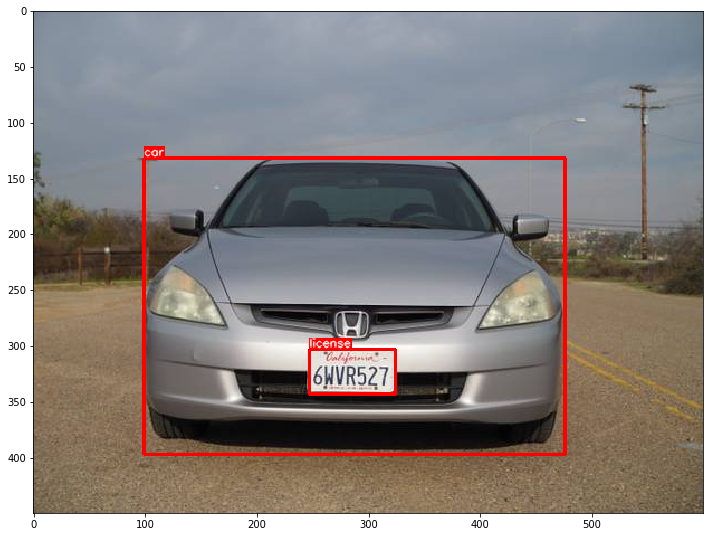

In [44]:
annotations = {
    'image': image, 
    'bboxes': pascal_bboxes,
    'category_id': category_ids
}

visualize(annotations, category_id_to_name)

## image 1 segmentation

In [45]:
CAR_ANN.keys()

dict_keys(['version', 'flags', 'shapes', 'lineColor', 'fillColor', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [46]:
CAR_ANN['shapes']

[{'label': 'car',
  'line_color': None,
  'fill_color': None,
  'points': [[99, 132], [476, 397]],
  'shape_type': 'rectangle'},
 {'label': 'license',
  'line_color': None,
  'fill_color': None,
  'points': [[247, 303], [324, 343]],
  'shape_type': 'rectangle'},
 {'label': 'car',
  'line_color': None,
  'fill_color': None,
  'points': [[155, 190],
   [195, 140],
   [213, 132],
   [374, 134],
   [427, 196],
   [430, 185],
   [463, 188],
   [462, 203],
   [434, 210],
   [472, 247],
   [477, 272],
   [469, 386],
   [112, 387],
   [100, 353],
   [102, 245],
   [145, 203],
   [124, 196],
   [120, 181],
   [152, 178]],
  'shape_type': 'polygon'},
 {'label': 'license',
  'line_color': None,
  'fill_color': None,
  'points': [[246, 342], [246, 303], [322, 303], [324, 344]],
  'shape_type': 'polygon'}]

In [47]:
segs = [x['points'] for x in CAR_ANN['shapes'] if x['shape_type'] == 'polygon']
segs

[[[155, 190],
  [195, 140],
  [213, 132],
  [374, 134],
  [427, 196],
  [430, 185],
  [463, 188],
  [462, 203],
  [434, 210],
  [472, 247],
  [477, 272],
  [469, 386],
  [112, 387],
  [100, 353],
  [102, 245],
  [145, 203],
  [124, 196],
  [120, 181],
  [152, 178]],
 [[246, 342], [246, 303], [322, 303], [324, 344]]]

In [48]:
# check COCO dataset "segmentation" data structure

In [49]:
next(iter(IMAGEID_TO_ANN.items()))

(391895,
 [{'segmentation': [[376.97,
     176.91,
     398.81,
     176.91,
     396.38,
     147.78,
     447.35,
     146.17,
     448.16,
     172.05,
     448.16,
     178.53,
     464.34,
     186.62,
     464.34,
     192.28,
     448.97,
     195.51,
     447.35,
     235.96,
     441.69,
     258.62,
     454.63,
     268.32,
     462.72,
     276.41,
     471.62,
     290.98,
     456.25,
     298.26,
     439.26,
     292.59,
     431.98,
     308.77,
     442.49,
     313.63,
     436.02,
     316.86,
     429.55,
     322.53,
     419.84,
     354.89,
     402.04,
     359.74,
     401.24,
     312.82,
     370.49,
     303.92,
     391.53,
     299.87,
     391.53,
     280.46,
     385.06,
     278.84,
     381.01,
     278.84,
     359.17,
     269.13,
     373.73,
     261.85,
     374.54,
     256.19,
     378.58,
     231.11,
     383.44,
     205.22,
     385.87,
     192.28,
     373.73,
     184.19]],
   'area': 12190.44565,
   'iscrowd': 0,
   'image_id': 391895,

In [50]:
segs[0]

[[155, 190],
 [195, 140],
 [213, 132],
 [374, 134],
 [427, 196],
 [430, 185],
 [463, 188],
 [462, 203],
 [434, 210],
 [472, 247],
 [477, 272],
 [469, 386],
 [112, 387],
 [100, 353],
 [102, 245],
 [145, 203],
 [124, 196],
 [120, 181],
 [152, 178]]

In [51]:
seg = np.array(segs[0]).reshape(-1)
seg

array([155, 190, 195, 140, 213, 132, 374, 134, 427, 196, 430, 185, 463,
       188, 462, 203, 434, 210, 472, 247, 477, 272, 469, 386, 112, 387,
       100, 353, 102, 245, 145, 203, 124, 196, 120, 181, 152, 178])

In [52]:
np.array(seg).reshape((int(len(seg)/2), 2))

array([[155, 190],
       [195, 140],
       [213, 132],
       [374, 134],
       [427, 196],
       [430, 185],
       [463, 188],
       [462, 203],
       [434, 210],
       [472, 247],
       [477, 272],
       [469, 386],
       [112, 387],
       [100, 353],
       [102, 245],
       [145, 203],
       [124, 196],
       [120, 181],
       [152, 178]])

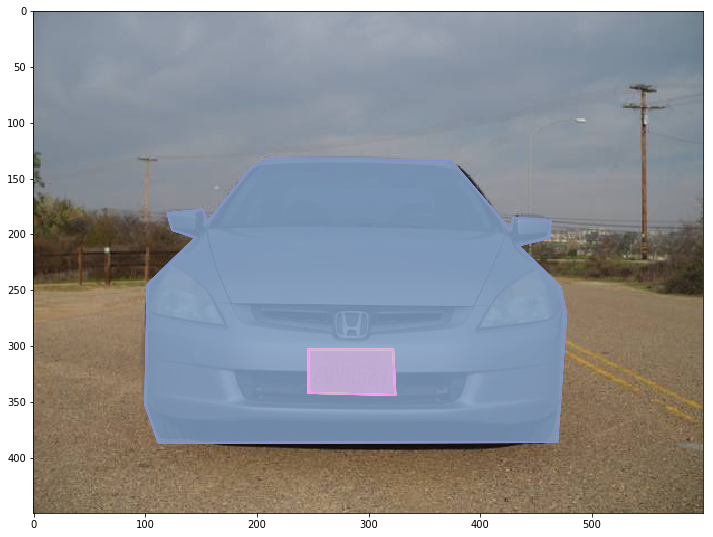

In [53]:
show_img(image)

ax = plt.gca()
polygons = []
color = []
anns = IMAGEID_TO_ANN[image_id]
for ann in anns:

    # polygon
    for s in [x['points'] for x in CAR_ANN['shapes'] if x['shape_type'] == 'polygon']:
        seg = np.array(s).reshape(-1)
        poly = np.array(seg).reshape((int(len(seg)/2), 2))
        polygons.append(Polygon(poly))
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        color.append(c)

p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)

## now that I've plotted both, put into a COCO dataset annotation format

In [54]:
next(iter(IMAGEID_TO_IMAGEANN.items()))

(391895,
 {'license': 3,
  'file_name': 'COCO_val2014_000000391895.jpg',
  'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'height': 360,
  'width': 640,
  'date_captured': '2013-11-14 11:18:45',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'id': 391895})

In [55]:
CAR_ANN.keys()

dict_keys(['version', 'flags', 'shapes', 'lineColor', 'fillColor', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [56]:
print(CAR_ANN['imagePath'], CAR_ANN['imageHeight'], CAR_ANN['imageWidth'])

filename, _ = os.path.splitext(CAR_ANN['imagePath'])
image_ann = {
    'id': int(filename),
    'height': CAR_ANN['imageHeight'],
    'width': CAR_ANN['imageWidth'],
    'file_name': CAR_ANN['imagePath']
}
image_ann

1.jpg 450 600


{'id': 1, 'height': 450, 'width': 600, 'file_name': '1.jpg'}

In [57]:
def get_filename(image_path):
    return os.path.basename(ann['imagePath'])

path = '/Users/aaron/Desktop/license_plate_detection/annotations/1.json'
ann = load_json(path)
get_filename(ann['imagePath'])

'1.jpg'

In [58]:
def get_image_ann(path):
    """
    Takes the path of a "labelme" style annotation and returns
    a COCO dataset syle image annotation
    """
    ann = load_json(path)
    filename, _ = os.path.splitext(os.path.basename(ann['imagePath']))
    return {
        'id': int(filename),
        'height': ann['imageHeight'],
        'width': ann['imageWidth'],
        'file_name': os.path.basename(ann['imagePath'])
    }

get_image_ann('/Users/aaron/Desktop/license_plate_detection/annotations/1.json')

{'id': 1, 'height': 450, 'width': 600, 'file_name': '1.jpg'}

In [59]:
path = '/Users/aaron/Desktop/license_plate_detection/annotations/1.json'
os.path.dirname(path)

'/Users/aaron/Desktop/license_plate_detection/annotations'

In [60]:
os.path.basename(path)

'1.json'

In [61]:
get_image_ann('/Users/aaron/Desktop/license_plate_detection/annotations/10.json')

{'id': 10, 'height': 450, 'width': 600, 'file_name': '10.jpg'}

In [62]:
!ls /Users/aaron/Desktop/license_plate_detection/annotations/

1.json  10.json


In [63]:
def list_files(path):
     return [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
dir_path = '/Users/aaron/Desktop/license_plate_detection/annotations/'
files = list_files(dir_path)
files

['/Users/aaron/Desktop/license_plate_detection/annotations/10.json',
 '/Users/aaron/Desktop/license_plate_detection/annotations/1.json']

In [64]:
file = files[0]
data = load_json(file)
data

{'version': '3.6.16',
 'flags': {},
 'shapes': [{'label': 'license',
   'line_color': None,
   'fill_color': None,
   'points': [[290, 386], [397, 433]],
   'shape_type': 'rectangle'},
  {'label': 'car',
   'line_color': None,
   'fill_color': None,
   'points': [[117, 72], [545, 442]],
   'shape_type': 'rectangle'},
  {'label': 'car',
   'line_color': None,
   'fill_color': None,
   'points': [[134, 279],
    [136, 243],
    [189, 156],
    [238, 74],
    [249, 66],
    [376, 72],
    [406, 91],
    [438, 143],
    [471, 146],
    [472, 165],
    [456, 172],
    [525, 268],
    [529, 313],
    [547, 349],
    [518, 412],
    [445, 440],
    [250, 440],
    [166, 416],
    [127, 386],
    [118, 335]],
   'shape_type': 'polygon'}],
 'lineColor': [0, 255, 0, 128],
 'fillColor': [255, 0, 0, 128],
 'imagePath': '../images/10.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOz

```
{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
                   260.24,
                   222.04,
                   270.49,
                   199.84,
                   253.41,
                   213.5,
                   227.79,
                   259.62,
                   200.46,
                   274.13,
                   202.17,
                   277.55,
                   210.71,
                   249.37,
                   253.41,
                   237.41,
                   264.51,
                   242.54,
                   261.95,
                   228.87,
                   271.34]]}
```

In [65]:
{'area': None,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': None}

{'area': None,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': None}

### bbox

In [66]:
data['shapes'][0]['points']

[[290, 386], [397, 433]]

In [67]:
[x['points'] for x in data['shapes'] if x['shape_type'] == 'rectangle']

[[[290, 386], [397, 433]], [[117, 72], [545, 442]]]

In [68]:
raw_bbs = [data['shapes'][0]['points']]
print(raw_bbs)
np_bbs = np.array(raw_bbs)

bboxes = np.reshape(np_bbs, (-1, 4))
bboxes
pascal_bboxes = np.array([bboxes[:,0], bboxes[:,1], bboxes[:,2]-bboxes[:,0], bboxes[:,3]-bboxes[:,1]]).T
pascal_bboxes

[[[290, 386], [397, 433]]]


array([[290, 386, 107,  47]])

In [69]:
category_ids

[0, 1]

In [70]:
file

'/Users/aaron/Desktop/license_plate_detection/annotations/10.json'

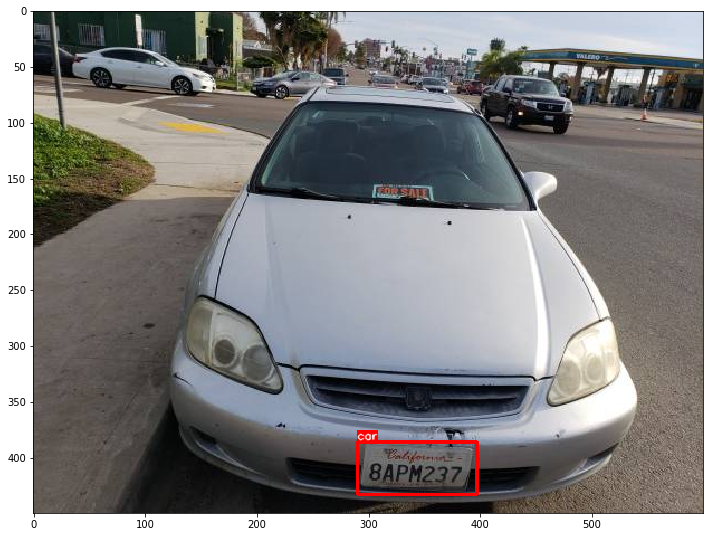

In [71]:
image = open_image('/Users/aaron/Desktop/license_plate_detection/images/10.jpg')
annotations = {
    'image': image, 
    'bboxes': pascal_bboxes,
    'category_id': category_ids
}

visualize(annotations, category_id_to_name)

### segmentation

In [72]:
data['shapes'][2]['points']

[[134, 279],
 [136, 243],
 [189, 156],
 [238, 74],
 [249, 66],
 [376, 72],
 [406, 91],
 [438, 143],
 [471, 146],
 [472, 165],
 [456, 172],
 [525, 268],
 [529, 313],
 [547, 349],
 [518, 412],
 [445, 440],
 [250, 440],
 [166, 416],
 [127, 386],
 [118, 335]]

In [73]:
np.array(data['shapes'][2]['points']).reshape(-1)

array([134, 279, 136, 243, 189, 156, 238,  74, 249,  66, 376,  72, 406,
        91, 438, 143, 471, 146, 472, 165, 456, 172, 525, 268, 529, 313,
       547, 349, 518, 412, 445, 440, 250, 440, 166, 416, 127, 386, 118,
       335])

In [74]:
data = load_json('/Users/aaron/Documents/github/mlearning/tests/data/annotations/1.json')

In [75]:
data['shapes'][1]['points']

[[178, 252], [209, 258], [208, 280], [179, 274]]

In [76]:
np.expand_dims(np.array(data['shapes'][1]['points']).reshape(-1), axis=0)

array([[178, 252, 209, 258, 208, 280, 179, 274]])

### output bbox and segmentation for mlearning test data

In [77]:
def get_annotation_bbox(labelme_bb):
    np_bbs = np.array(labelme_bb)
    bbs = np.reshape(np_bbs, (-1, 4))
    return np.array(
        [bbs[:,0], bbs[:,1], bbs[:,2]-bbs[:,0], bbs[:,3]-bbs[:,1]]
    ).T.squeeze().tolist()

get_annotation_bbox(data['shapes'][0]['points'])

[179, 252, 29, 28]

In [78]:
get_annotation_bbox(data['shapes'][2]['points'])

[158, 137, 373, 182]

In [79]:
def get_segmentation(labelme_seg):
    return np.expand_dims(
        np.array(labelme_seg).reshape(-1), axis=0).tolist()
    
get_segmentation(data['shapes'][1]['points'])

[[178, 252, 209, 258, 208, 280, 179, 274]]

In [80]:
data['shapes'][1]['points']

[[178, 252], [209, 258], [208, 280], [179, 274]]

In [81]:
get_segmentation(data['shapes'][3]['points'])

[[254,
  180,
  313,
  142,
  407,
  133,
  476,
  139,
  519,
  174,
  529,
  187,
  530,
  226,
  510,
  270,
  484,
  270,
  396,
  298,
  379,
  317,
  345,
  319,
  327,
  305,
  281,
  306,
  164,
  282,
  153,
  237,
  184,
  204]]

In [82]:
data

{'version': '3.6.16',
 'flags': {},
 'shapes': [{'label': 'license',
   'line_color': None,
   'fill_color': None,
   'points': [[179, 252], [208, 280]],
   'shape_type': 'rectangle'},
  {'label': 'license',
   'line_color': None,
   'fill_color': None,
   'points': [[178, 252], [209, 258], [208, 280], [179, 274]],
   'shape_type': 'polygon'},
  {'label': 'car',
   'line_color': None,
   'fill_color': None,
   'points': [[158, 137], [531, 319]],
   'shape_type': 'rectangle'},
  {'label': 'car',
   'line_color': None,
   'fill_color': None,
   'points': [[254, 180],
    [313, 142],
    [407, 133],
    [476, 139],
    [519, 174],
    [529, 187],
    [530, 226],
    [510, 270],
    [484, 270],
    [396, 298],
    [379, 317],
    [345, 319],
    [327, 305],
    [281, 306],
    [164, 282],
    [153, 237],
    [184, 204]],
   'shape_type': 'polygon'}],
 'lineColor': [0, 255, 0, 128],
 'fillColor': [255, 0, 0, 128],
 'imagePath': '../images/1.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2

In [86]:
def get_image_anns(dirpath):
    ret = []
    for f in list_files(dirpath):
        filepath = os.path.join(dirpath, f)
        ret.append(get_image_ann(filepath))
    return ret

dir_path = '/Users/aaron/Desktop/license_plate_detection/annotations/'
get_image_anns(dir_path)

[{'id': 10, 'height': 450, 'width': 600, 'file_name': '10.jpg'},
 {'id': 1, 'height': 450, 'width': 600, 'file_name': '1.jpg'}]

### 2nd image

In [98]:
path = '/Users/aaron/Documents/github/mlearning/tests/data/annotations/2.json'
data = load_json(path)

In [99]:
for i, shape in enumerate(data['shapes']):
    print(shape['label'])
    if i % 2 == 0:
        print('bbox')
        print(get_annotation_bbox(shape['points']))
    else:
        print('seg')
        print(get_segmentation(shape['points']))
    print()

car
bbox
[124, 68, 423, 375]

car
seg
[[184, 155, 245, 68, 379, 76, 404, 91, 439, 145, 470, 147, 474, 163, 453, 174, 525, 275, 528, 315, 546, 350, 518, 409, 443, 441, 228, 437, 130, 392, 117, 335, 129, 281, 143, 224]]

license
bbox
[291, 386, 105, 44]

license
seg
[[298, 386, 394, 391, 388, 428, 292, 427]]



In [100]:
os.path.splitext(os.path.basename(path))

('2', '.json')

In [91]:
data['shapes'][0]['label']

'car'

In [88]:
get_annotation_bbox(data['shapes'][0]['points'])

[124, 68, 423, 375]

In [92]:
os.path.splitext(os.path.basename(data['imagePath']))

('2', '.jpg')

In [84]:
ANN['images'][0]

{'license': 3,
 'file_name': 'COCO_val2014_000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [85]:
!pwd

/Users/aaron/Documents/github/maskrcnn-benchmark/demo


# mlearning.coco - try to generate an annotations.json file!

In [102]:
from mlearning.coco import Annotation

In [103]:
path = '/Users/aaron/Desktop/license_plate_detection/annotations/'
ann = Annotation(path)

In [105]:
output_dir = '/Users/aaron/Desktop/license_plate_detection/output/'
os.mkdir(output_dir)

In [106]:
output_path = os.path.join(output_dir, 'annotations.json')

ann.generate(output_path)

### set config for my dataset

In [6]:
import os
from mlearning.util import load_json

def get_imageid_to_imageann(ann):
    return {x['id']: x for x in ann['images']}

def get_imageid_to_anns(ann_path=None, ann=None):
    """
    Returns a dict where the key is an imageid and the value
    is a list of annotations for that image
    """
    if not any([ann_path, ann]) or all([ann_path, ann]):
        raise AssertionError("can only use 1 kwarg")

    if not ann:
        ann = load_json(ann_path)

    imageid_to_anns = {}
    for img in ann['images']:
        imageid_to_anns[img['id']] = []

    for a in ann['annotations']:
        imageid_to_anns[a['image_id']].append(a)

    return imageid_to_anns

HOME_DIR = os.path.expanduser('~')
DATA_DIR2 = os.path.join(HOME_DIR, 'Desktop/license_plate_detection/images/')
ANN_DIR2 = os.path.join(HOME_DIR, 'Desktop/license_plate_detection/output/')

ANN2 = load_json(os.path.join(ANN_DIR2, 'annotations.json'))
IMAGEID_TO_IMAGEANN2 = get_imageid_to_imageann(ANN2)
CATEGORY_ID_TO_NAME2 = {x['id']: x['name'] for x in ANN2['categories']}
IMAGE_IDS2 = list(IMAGEID_TO_IMAGEANN2.keys())
IMAGEID_TO_ANN2 = get_imageid_to_anns(ann=ANN2)

In [9]:
import cv2
import os

def open_image(image_path):
    """
    Returns an image as a rgb np.ndarray
    """
    bgr_img = cv2.imread(image_path)
    # get b,g,r
    b,g,r = cv2.split(bgr_img)
    # switch it to rgb
    return cv2.merge([r,g,b])

In [10]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img, class_name, (x_min, y_min - int(0.3 * text_height)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    

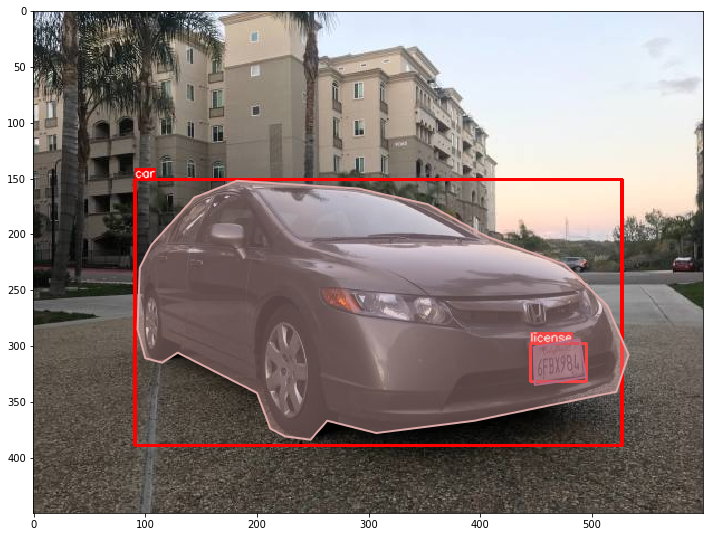

In [13]:
import json
import os

import numpy as np
from matplotlib import patches, patheffects
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

plt.ion()
pylab.rcParams['figure.figsize'] = 12, 12

def plot_bboxes_and_masks(image_id=None):
    image_id = image_id or np.random.choice(IMAGE_IDS2)
    image_ann = IMAGEID_TO_IMAGEANN2[image_id]
    image_path = os.path.join(DATA_DIR2, image_ann['file_name'])
    image = open_image(image_path)

    # image + bboxes
    bboxes = [x['bbox'] for x in IMAGEID_TO_ANN2[image_id]]
    category_ids = [x['category_id'] for x in IMAGEID_TO_ANN2[image_id]]
    annotations = {
        'image': image, 
        'bboxes': bboxes,
        'category_id': category_ids
    }
    visualize(annotations, CATEGORY_ID_TO_NAME2)

    ax = plt.gca()
    polygons = []
    color = []
    anns = IMAGEID_TO_ANN2[image_id]
    for ann in anns:
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        # polygon
        for seg in ann['segmentation']:
            poly = np.array(seg).reshape((int(len(seg)/2), 2))
            polygons.append(Polygon(poly))
            color.append(c)

    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)
    
plot_bboxes_and_masks()